# The Sparks Foundation

## Data Science and Business Analytics

### Task-1 Prediction using Supervised ML

Arul Dharshan.S

Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Matplotlib is building the font cache; this may take a moment.


Reading the Data from the file

In [3]:
dat='http://bit.ly/w-data'
df=pd.read_csv(dat)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.shape

(25, 2)

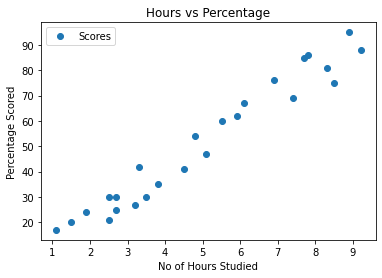

In [9]:
#plotting the distribution of scores
df.plot(x="Hours",y="Scores",style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

#### The graph clearly depicts that there is a positive linear relation between the number of hours studied and percentage of score.

In [10]:
corr_max=df.corr()
corr_max

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Correlation matrix shows they are interrelated.

### Preparing the Data
Dividing them into labels and attributes

In [11]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now we split this data into training and test sets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

### Training the Algortithm

In [16]:
#Training the simple linear regression model on the training set
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Training complete.")

Training complete.


In [20]:
#Regression Line
line=regressor.coef_*x+regressor.intercept_

### Plotting the Regression Line

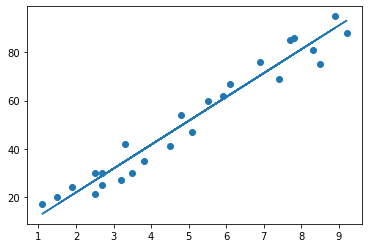

In [23]:
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Predicting the results

In [25]:
y_pred = regressor.predict(X_test)

In [27]:
# Comparing Actual vs Predicted
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dff 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be the predicted score if a student studies for 9.25 hrs/day?

In [30]:
hours=[9.25]
pred_score=regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


#### Predicted Score = 93.69173248737538 for 9.25 Number of hours

### Evaluvating the fitness of the algorithm

In [31]:
#1. Mean Absolute Error
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error: ',mae)

#2. Root mean squared error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',rmse)

#3. Coefficient of determination
r2=r2_score(y_test,y_pred)
print("R-squared: ",r2)

Mean Absolute Error:  4.183859899002975
Root Mean Squared Error:  4.6474476121003665
R-squared:  0.9454906892105356


In [32]:
print("The accuracy of the model is {}%".format(round(r2*100,2)))

The accuracy of the model is 94.55%


### The accuracy of the model is 94.55%